<a href="https://colab.research.google.com/github/ClaraMikaelly-ifpi/IA/blob/main/aula_26_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation

import tensorflow.keras.utils as np_utils

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#montar model
from keras.datasets import cifar10
batch_size = 32
epochs = 100
n_classes = 10

(x_train , y_train) , (x_test , y_test) = cifar10.load_data()

In [ ]:
print (x_train.shape)

height = x_train.shape[1]
width = x_train.shape[2]

(50000, 32, 32, 3)


In [ ]:
x_val = x_train[:5000,:,:,:]
y_val = y_train[:5000]
x_train = x_train[5000:,:,:,:]
y_train = y_train[5000:]

print('Train datasets',x_train.shape,y_train.shape)
print('Validation datasets',x_val.shape,y_val.shape)
print('Test datasets',x_test.shape,y_test.shape)

Train datasets (45000, 32, 32, 3) (45000, 1)
Validation datasets (5000, 32, 32, 3) (5000, 1)
Test datasets (10000, 32, 32, 3) (10000, 1)


[6]


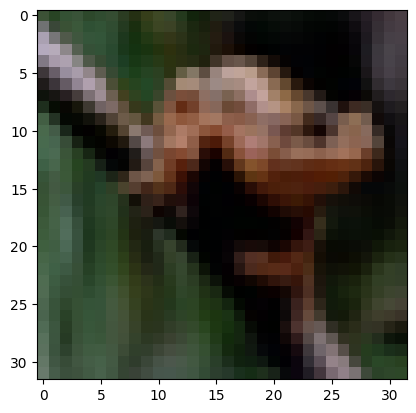

In [ ]:
image = x_train[0]
plt.imshow(image)

label = y_train[0]
print(label)

In [ ]:
#converter as labels to categorical
print(y_train)
y_train = np_utils.to_categorical(y_train,n_classes)
y_val = np_utils.to_categorical(y_val,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)

#[1] ==> [0001000000]

print(y_train)

[[6]
 [7]
 [9]
 ...
 [9]
 [1]
 [1]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#Normaliação
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_val /= 255
x_test /= 255

In [ ]:
def create_model():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(n_classes, activation='softmax'))

    return model

model = create_model()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=100,
                   validation_data=(x_test, y_test),
                   verbose=1)

model.summary()

Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.1825 - loss: 2.3502 - val_accuracy: 0.3835 - val_loss: 1.6381
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.3793 - loss: 1.6882 - val_accuracy: 0.4563 - val_loss: 1.5153
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4922 - loss: 1.4168 - val_accuracy: 0.6138 - val_loss: 1.1475
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5702 - loss: 1.2227 - val_accuracy: 0.6793 - val_loss: 0.9934
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6227 - loss: 1.0963 - val_accuracy: 0.5900 - val_loss: 1.2479
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6510 - loss: 1.0325 - val_accuracy: 0.7217 - val_loss: 0.8447
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6793 - loss: 0.9449 - val_accuracy: 0.7574 - val_loss: 0.7345
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_49 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         8,25

 Total params: 5,043,360 (19.24 MB)

 Trainable params: 1,680,522 (6.41 MB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 3,361,046 (12.82 MB)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

pred = model.predict(x_test)

print(pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[[2.53088643e-08 8.85543028e-10 6.70893257e-07 ... 1.08145194e-07
  5.15521847e-10 8.80080314e-11]
 [3.37786226e-08 1.73368642e-06 4.67603711e-17 ... 3.17372722e-20
  9.99998212e-01 8.48770568e-11]
 [1.20515404e-06 1.52139902e-01 2.68689801e-13 ... 1.67331088e-13
  8.47846270e-01 1.26211835e-05]
 ...
 [5.43561350e-18 2.90432113e-16 1.34119826e-08 ... 5.93996363e-09
  2.15199205e-18 2.96269646e-18]
 [1.37128026e-11 9.99996424e-01 8.73244890e-15 ... 6.70994222e-17
  4.66403804e-10 3.62539731e-06]
 [8.41948409e-26 7.16988077e-33 2.67774278e-22 ... 1.00000000e+00
  8.85827460e-35 2.88080355e-26]]


In [ ]:
results = model.evaluate(x_test, y_test, verbose=0)

print(f"Loss: {results[0]:.4f}")
print(f"Accuracy: {results[1]:.4f}")

Loss: 0.5618
Accuracy: 0.8731


In [ ]:
score = model.evaluate(x_test, y_test)
pred = model.predict(x_test)
print(pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8739 - loss: 0.5536
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[2.53088643e-08 8.85543028e-10 6.70893257e-07 ... 1.08145194e-07
  5.15521847e-10 8.80080314e-11]
 [3.37786226e-08 1.73368642e-06 4.67603711e-17 ... 3.17372722e-20
  9.99998212e-01 8.48770568e-11]
 [1.20515404e-06 1.52139902e-01 2.68689801e-13 ... 1.67331088e-13
  8.47846270e-01 1.26211835e-05]
 ...
 [5.43561350e-18 2.90432113e-16 1.34119826e-08 ... 5.93996363e-09
  2.15199205e-18 2.96269646e-18]
 [1.37128026e-11 9.99996424e-01 8.73244890e-15 ... 6.70994222e-17
  4.66403804e-10 3.62539731e-06]
 [8.41948409e-26 7.16988077e-33 2.67774278e-22 ... 1.00000000e+00
  8.85827460e-35 2.88080355e-26]]


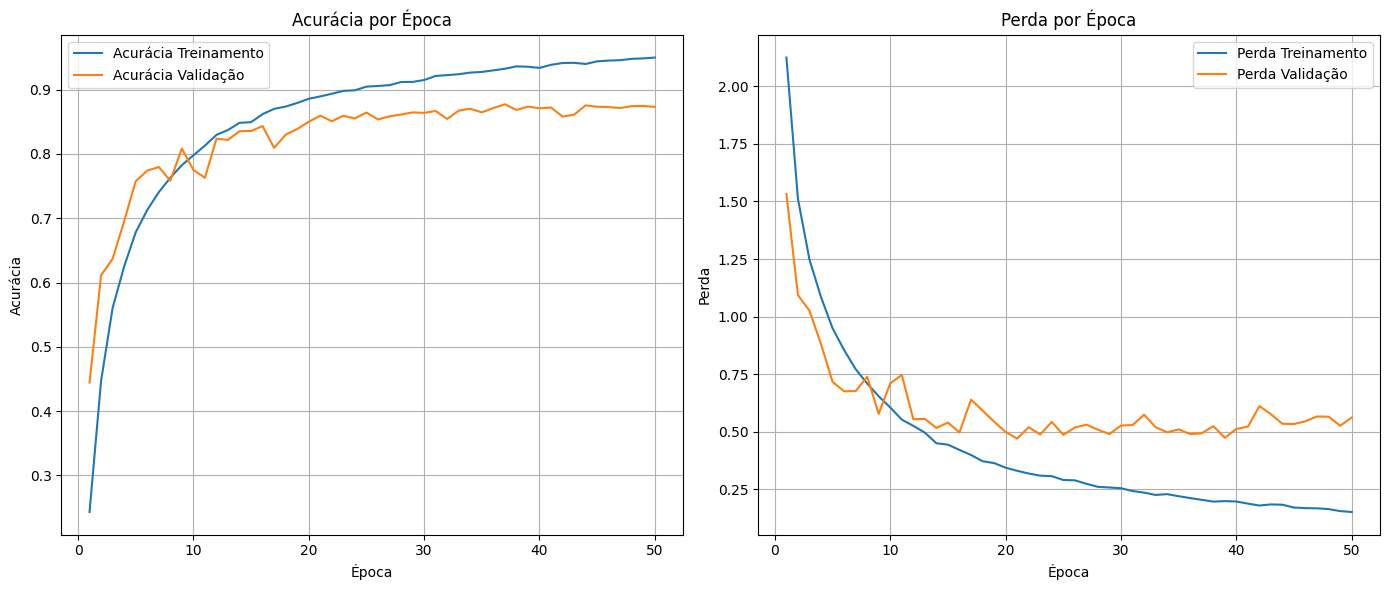

In [ ]:
import matplotlib.pyplot as plt

# Épocas
epochs = list(range(1, 51))

# Acurácias e perdas extraídas manualmente
accuracy = [
    0.2432, 0.4472, 0.5605, 0.6250, 0.6781, 0.7128, 0.7405, 0.7629, 0.7826, 0.7977,
    0.8130, 0.8296, 0.8373, 0.8484, 0.8494, 0.8619, 0.8701, 0.8737, 0.8793, 0.8858,
    0.8895, 0.8936, 0.8981, 0.8990, 0.9047, 0.9057, 0.9070, 0.9118, 0.9120, 0.9150,
    0.9213, 0.9226, 0.9240, 0.9265, 0.9275, 0.9300, 0.9325, 0.9362, 0.9356, 0.9338,
    0.9386, 0.9414, 0.9417, 0.9399, 0.9440, 0.9452, 0.9458, 0.9479, 0.9486, 0.9499
]
val_accuracy = [
    0.4445, 0.6113, 0.6369, 0.6955, 0.7575, 0.7740, 0.7797, 0.7585, 0.8083, 0.7753,
    0.7629, 0.8237, 0.8218, 0.8354, 0.8357, 0.8433, 0.8094, 0.8300, 0.8387, 0.8500,
    0.8595, 0.8508, 0.8594, 0.8552, 0.8644, 0.8537, 0.8584, 0.8613, 0.8646, 0.8639,
    0.8668, 0.8544, 0.8674, 0.8703, 0.8647, 0.8714, 0.8772, 0.8684, 0.8736, 0.8710,
    0.8722, 0.8581, 0.8610, 0.8756, 0.8734, 0.8729, 0.8714, 0.8744, 0.8747, 0.8731
]
loss = [
    2.1245, 1.5111, 1.2473, 1.0844, 0.9492, 0.8549, 0.7718, 0.7093, 0.6537, 0.6055,
    0.5527, 0.5256, 0.4962, 0.4501, 0.4442, 0.4212, 0.3992, 0.3722, 0.3641, 0.3440,
    0.3305, 0.3188, 0.3094, 0.3073, 0.2907, 0.2892, 0.2741, 0.2610, 0.2580, 0.2548,
    0.2427, 0.2358, 0.2258, 0.2292, 0.2203, 0.2120, 0.2045, 0.1968, 0.1989, 0.1972,
    0.1881, 0.1798, 0.1846, 0.1833, 0.1709, 0.1685, 0.1676, 0.1642, 0.1556, 0.1517
]
val_loss = [
    1.5323, 1.0933, 1.0252, 0.8807, 0.7166, 0.6756, 0.6765, 0.7388, 0.5778, 0.7101,
    0.7469, 0.5543, 0.5559, 0.5168, 0.5399, 0.4972, 0.6395, 0.5924, 0.5440, 0.4993,
    0.4703, 0.5197, 0.4884, 0.5429, 0.4866, 0.5184, 0.5308, 0.5089, 0.4903, 0.5270,
    0.5289, 0.5740, 0.5198, 0.4975, 0.5104, 0.4898, 0.4934, 0.5245, 0.4737, 0.5123,
    0.5223, 0.6113, 0.5760, 0.5344, 0.5338, 0.5457, 0.5665, 0.5652, 0.5260, 0.5618
]

# Gráficos
plt.figure(figsize=(14, 6))

# Acurácia
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Acurácia Treinamento')
plt.plot(epochs, val_accuracy, label='Acurácia Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época')
plt.legend()
plt.grid(True)

# Perda
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Perda Treinamento')
plt.plot(epochs, val_loss, label='Perda Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Perda por Época')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
